# Análise das reclamações da LATAM
Análise das reclamações na plataforma *consumidor.gov.br* a partir das informações disponibilizadas no portal ANAC no período entre 2019 e 2022.

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

ModuleNotFoundError: No module named 'plotly'

In [3]:
## Leitura dos dados

df_2019 = pd.read_csv("DADOS/DadosDoConsumidor2019.csv", sep = ";", skiprows=1)
df_2020 = pd.read_csv("DADOS/DadosDoConsumidor2020.csv", sep = ";", skiprows=1)
df_2021 = pd.read_csv("DADOS/DadosDoConsumidor2021.csv", sep = ";", skiprows=1)
df_2022 = pd.read_csv("DADOS/DadosDoConsumidor2022.csv", sep = ";", skiprows=1)

In [4]:
## conferência se todas as colunas possuem a mesma dimensão e se as bases foram carregadas corretamente
print(df_2019.shape, df_2020.shape, df_2021.shape, df_2022.shape)

(49866, 38) (66956, 38) (107609, 38) (114470, 38)


In [5]:
# concantenando as bases
df_final = pd.concat([df_2019, df_2020, df_2021, df_2022]).reset_index(drop = True)

## Avaliação da base final

In [ ]:
df_final.shape

(338901, 38)

In [6]:
df_final.info

<bound method DataFrame.info of                                                    Gestor   CanalDeOrigem  \
0             Fundação de Proteção e Defesa do Consumidor  Plataforma Web   
1             Fundação de Proteção e Defesa do Consumidor  Plataforma Web   
2                       Secretaria Nacional do Consumidor  Plataforma Web   
3       Instituto Municipal de Proteção e Defesa do Co...  Plataforma Web   
4       Superintendência de Proteção e Defesa do Consu...  Plataforma Web   
...                                                   ...             ...   
338896  Nucleo de Defesa do Consumidor da Defensoria P...  Plataforma Web   
338897  Instituto Estadual de Proteção e Defesa do Con...  Plataforma Web   
338898                  Secretaria Nacional do Consumidor  Plataforma Web   
338899  Secretaria de Estado da Justiça e Cidadania de...  Plataforma Web   
338900         Coordenação Estadual do Procon de Rondônia  Plataforma Web   

       Região  UF                Cidade Sex

In [7]:
df_final.head()

,Gestor,CanalDeOrigem,Região,UF,Cidade,Sexo,FaixaEtária,AnoAbertura,MêsAbertura,DataAbertura,...,ComoComprouContratou,ProcurouEmpresa,Respondida,Situação,AvaliaçãoReclamação,NotaDoConsumidor,AnáliseDaRecusa,EdiçãoDeConteúdo,InteraçãoDoGestor,CódigoClassificadorANAC
0,Fundação de Proteção e Defesa do Consumidor,Plataforma Web,SE,SP,Barueri,M,entre 31 a 40 anos,2019,1,01/01/2019,...,Internet,S,S,Finalizada avaliada,Não Resolvida,4.0,NaN,N,N,2205
1,Fundação de Proteção e Defesa do Consumidor,Plataforma Web,SE,SP,Ribeirão Pires,M,entre 31 a 40 anos,2019,1,01/01/2019,...,Não comprei / contratei,S,S,Finalizada avaliada,Não Resolvida,3.0,NaN,N,N,2225/2315
2,Secretaria Nacional do Consumidor,Plataforma Web,NE,RN,Serra Negra do Norte,M,entre 31 a 40 anos,2019,1,01/01/2019,...,Internet,S,S,Finalizada não avaliada,Não Avaliada,NaN,NaN,N,N,0505
3,Instituto Municipal de Proteção e Defesa do Co...,Plataforma Web,SE,RJ,Rio de Janeiro,M,entre 31 a 40 anos,2019,1,01/01/2019,...,Internet,N,S,Finalizada avaliada,Resolvida,4.0,NaN,N,N,3505
4,Superintendência de Proteção e Defesa do Consu...,Plataforma Web,CO,GO,Goiânia,F,entre 21 a 30 anos,2019,1,01/01/2019,...,Internet,S,S,Finalizada avaliada,Resolvida,5.0,NaN,N,N,1400


In [8]:
df_final.groupby(['NomeFantasia'])["NomeFantasia"].count().sort_values(ascending=False)

NomeFantasia
Latam Airlines (Tam)                          116843
Gol Linhas Aéreas                              95442
Azul Linhas Aéreas                             46360
TAP Air Portugal                               23520
Avianca - Oceanair (DESATIVADA)                 8032
Alitalia                                        5056
Iberia Lineas Aereas                            4534
Avianca - Voos internacionais                   3976
Itapemirim Transportes Aéreos                   3846
Copa Airlines                                   3602
Itapemirim Transportes Aéreos (DESATIVADA)      3107
American Airlines                               2714
Air France                                      2059
Air Europa                                      1891
Aeromexico                                      1612
Lufthansa                                       1462
Aerolíneas Argentinas                           1461
KLM                                             1404
Qatar Airways                    

## Selecionando a base de interesse
Apenas reclamações relacionadas a Latam

In [9]:
df_latam = df_final.query("NomeFantasia == 'Latam Airlines (Tam)'")

In [10]:
df_latam.describe()

,AnoAbertura,MêsAbertura,PrazoAnaliseGestor,TempoResposta,NotaDoConsumidor
count,116843.000000,116843.000000,592.000000,116618.000000,65442.000000
mean,2020.844912,6.386390,9.275338,5.390094,2.929480
std,1.055854,3.631838,5.269733,3.596036,1.751948
min,2019.000000,1.000000,0.000000,0.000000,1.000000
25%,2020.000000,3.000000,4.000000,2.000000,1.000000
50%,2021.000000,6.000000,12.000000,5.000000,3.000000
75%,2022.000000,10.000000,14.000000,8.000000,5.000000
max,2022.000000,12.000000,17.000000,16.000000,5.000000


In [11]:
df_latam.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116843 entries, 0 to 338897
Data columns (total 38 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Gestor                   116843 non-null  object 
 1   CanalDeOrigem            116843 non-null  object 
 2   Região                   116843 non-null  object 
 3   UF                       116843 non-null  object 
 4   Cidade                   116843 non-null  object 
 5   Sexo                     116841 non-null  object 
 6   FaixaEtária              116843 non-null  object 
 7   AnoAbertura              116843 non-null  int64  
 8   MêsAbertura              116843 non-null  int64  
 9   DataAbertura             116843 non-null  object 
 10  HoraAbertura             116843 non-null  object 
 11  DataResposta             116618 non-null  object 
 12  HoraResposta             116618 non-null  object 
 13  DataAnálise              592 non-null     object 
 14  Hora

In [12]:
df_latam.groupby(['NomeFantasia'])["NomeFantasia"].count().sort_values(ascending=False)

NomeFantasia
Latam Airlines (Tam)    116843
Name: NomeFantasia, dtype: int64

In [13]:
df_latam.groupby(['NomeFantasia','AnoAbertura'])["NomeFantasia"].count().sort_values(ascending=False)

NomeFantasia          AnoAbertura
Latam Airlines (Tam)  2022           41058
                      2021           33022
                      2020           26347
                      2019           16416
Name: NomeFantasia, dtype: int64

### Reclamações por mês
Comparação geral das reclamações mês x mês


In [20]:
reclamacoes_mes = df_latam.groupby(["AnoAbertura", "MêsAbertura"])["NomeFantasia"].count()

# Resetar o índice para tornar o DataFrame resultante mais fácil de manipular
reclamacoes_mes = reclamacoes_mes.reset_index()


In [15]:
reclamacoes_mes

,AnoAbertura,MêsAbertura,NomeFantasia
0,2019,1,1224
1,2019,2,1049
2,2019,3,1026
3,2019,4,1073
4,2019,5,1123
5,2019,6,1130
6,2019,7,1589
7,2019,8,1339
8,2019,9,1344
9,2019,10,1813


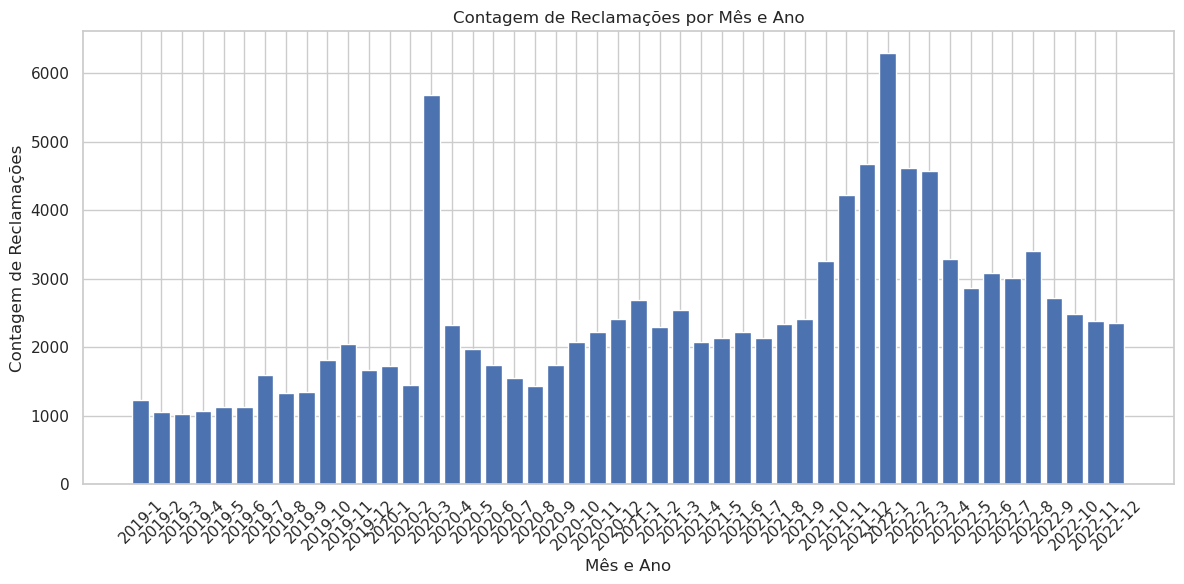

In [18]:
## Gráfico de reclamações por mes e ano
plt.figure(figsize=(12,6))
plt.bar(reclamacoes_mes["AnoAbertura"].astype(str) + "-" + reclamacoes_mes["MêsAbertura"].astype(str), reclamacoes_mes["NomeFantasia"], color='b')
plt.title('Contagem de Reclamações por Mês e Ano')
plt.xlabel('Mês e Ano')
plt.ylabel('Contagem de Reclamações')
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x para melhor legibilidade (opcional)
plt.grid(True)
plt.tight_layout()
plt.show()

In [22]:
media = reclamacoes_mes['NomeFantasia'].mean().round(2)
media

2434.23

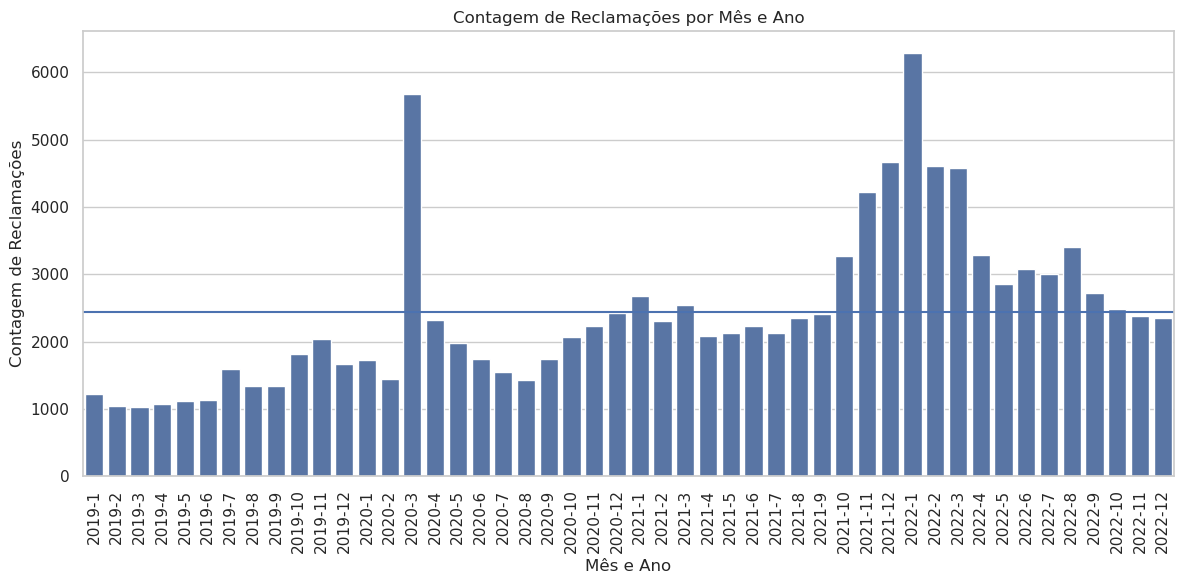

In [23]:
# Definir o estilo Seaborn
sns.set(style="whitegrid")

# Criar um gráfico de barras com Seaborn
plt.figure(figsize=(12, 6))  # Tamanho da figura (opcional)
sns.barplot(x=reclamacoes_mes["AnoAbertura"].astype(str) + "-" + reclamacoes_mes["MêsAbertura"].astype(str), y=reclamacoes_mes["NomeFantasia"], color='b')
plt.title('Contagem de Reclamações por Mês e Ano')
plt.xlabel('Mês e Ano')
plt.ylabel('Contagem de Reclamações')
plt.xticks(rotation=90)  # Rotacionar os rótulos do eixo x para melhor legibilidade (opcional)
plt.axhline(media)

# Mostrar o gráfico
plt.tight_layout()
plt.show()

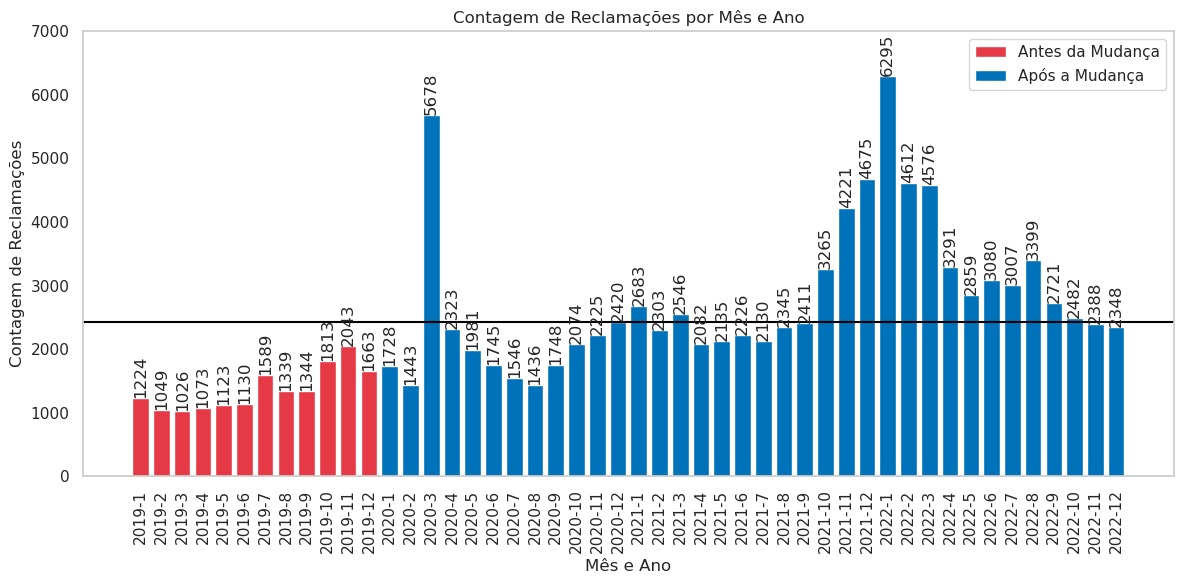

In [33]:
# Definir a data de mudança de cor
data_mudanca_cor = "2020-03"  # Substitua pela data desejada
sns.set_style("whitegrid", {'grid.color':'white'})

# Dividir os dados em duas partes com base na data de mudança de cor
reclamacoes_antes_mudanca = reclamacoes_mes[reclamacoes_mes["AnoAbertura"].astype(str) + "-" + reclamacoes_mes["MêsAbertura"].astype(str) < data_mudanca_cor]
reclamacoes_apos_mudanca = reclamacoes_mes[reclamacoes_mes["AnoAbertura"].astype(str) + "-" + reclamacoes_mes["MêsAbertura"].astype(str) >= data_mudanca_cor]

# Definir as cores para cada parte
cor_antes_mudanca = '#e63946' # Cor antes da mudança
cor_apos_mudanca =  '#0072ba'   # Cor após a mudança

# Criar um gráfico de barras com duas partes usando as cores definidas
plt.figure(figsize=(12, 6))  # Tamanho da figura (opcional)
plt.axhline(media, color = 'black')
plt.bar(reclamacoes_antes_mudanca["AnoAbertura"].astype(str) + "-" + reclamacoes_antes_mudanca["MêsAbertura"].astype(str), reclamacoes_antes_mudanca["NomeFantasia"], color=cor_antes_mudanca, label="Antes da Mudança")
plt.bar(reclamacoes_apos_mudanca["AnoAbertura"].astype(str) + "-" + reclamacoes_apos_mudanca["MêsAbertura"].astype(str), reclamacoes_apos_mudanca["NomeFantasia"], color=cor_apos_mudanca, label="Após a Mudança")
plt.title('Contagem de Reclamações por Mês e Ano')
plt.xlabel('Mês e Ano')
plt.ylabel('Contagem de Reclamações')
plt.ylim(0,7000) # ajuste do limite


# Girar os rótulos do eixo x em 90 graus
plt.xticks(rotation=90)

plt.legend()  # Adicionar legenda

# Adicionar rótulos às barras
for index, row in reclamacoes_antes_mudanca.iterrows():
    plt.annotate(str(row["NomeFantasia"]), (row["AnoAbertura"].astype(str) + "-" + row["MêsAbertura"].astype(str), row["NomeFantasia"]), ha="center", va="bottom", rotation = 90)

for index, row in reclamacoes_apos_mudanca.iterrows():
    plt.annotate(str(row["NomeFantasia"]), (row["AnoAbertura"].astype(str) + "-" + row["MêsAbertura"].astype(str), row["NomeFantasia"]), ha="center", va="bottom", rotation =90)

# Mostrar o gráfico
plt.tight_layout()
plt.show()


## Avaliação dos tipos de reclamação